In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Joining both data set, to make it easier to edit both at the same time.

In [32]:
all_df = [train_df,test_df]

In [33]:
for df in all_df:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [34]:
for df in all_df:
    print(df.describe().T)

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  
             count         mean         std     min       25%        50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.5000   
Pclass       418.0     

Looking for NaN values in the datasets, we find that the Age is missing, however that can easily be predicted for. The cabins are missing a lot of values we might consider removin them directly. Embarked and Fare are also missing for 3 values. These can be looked up to see if we can find them online. If not, then we can just drop the values.

In [35]:
for df in all_df:
    print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The following two plots confirm that ladies are first, and that the wealthy are more likely to survive in case of disaster. Sad if you ask me.

<AxesSubplot:xlabel='Survived', ylabel='count'>

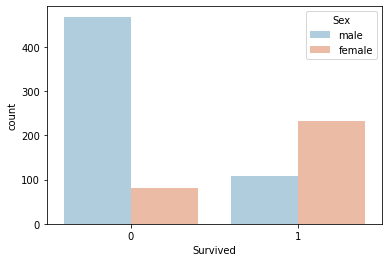

In [36]:
sns.countplot(x = 'Survived',hue = 'Sex', data=train_df, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

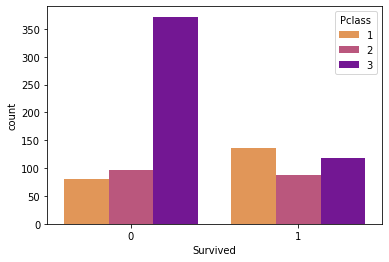

In [37]:
sns.countplot(hue = 'Pclass', x = 'Survived', data = train_df, palette="plasma_r")

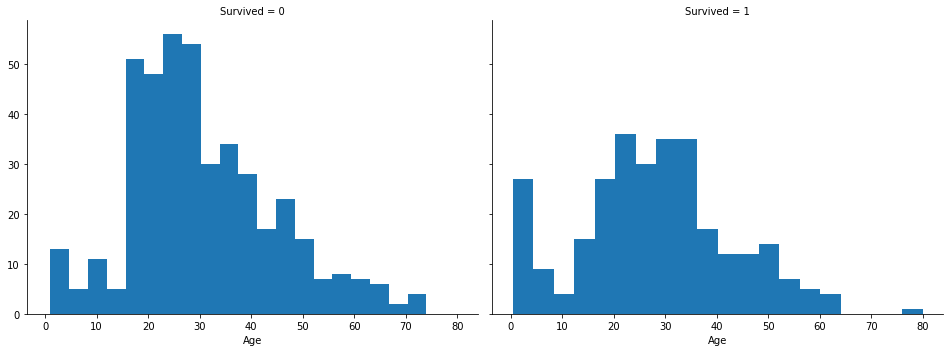

In [38]:
g = sns.FacetGrid(train_df, col='Survived',height=5, aspect= 1.33)
g.map(plt.hist, 'Age', bins=20)

Visulazing the missing data to make it easier to interpret.

<AxesSubplot:>

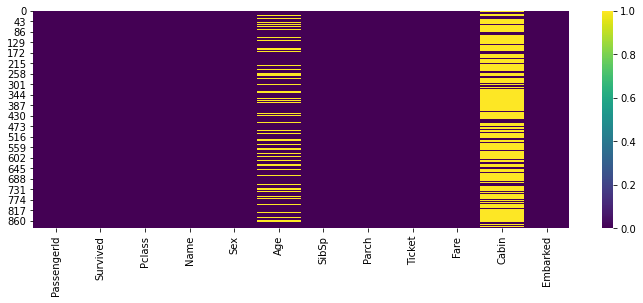

In [39]:
plt.figure(figsize=(12,4))
# Training Data
sns.heatmap(data=train_df.isna(),cmap='viridis')

<AxesSubplot:>

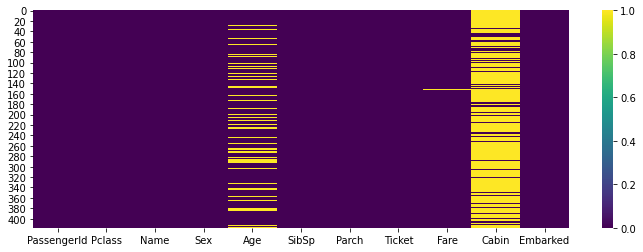

In [40]:
plt.figure(figsize=(12,4))
# Test Data
sns.heatmap(data=test_df.isna(),cmap='viridis')

Looking up both passengers that are missing the embarked value. We find two females that are on first class, Mrs. George Nelson and her maid Miss Amelie . They both embraked at Southampton. THis can be found here: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

"Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."

In [41]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Filling the data and double checking if there still are any missing values.

In [42]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [43]:
train_df['Embarked'].isna().sum()

0

Mr Thomas was in third class. Taking the mean of the fare for the third class makes sense.

In [44]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [45]:
test_df[['Fare','Pclass']].groupby('Pclass').mean()

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [46]:
test_df['Fare'] = test_df['Fare'].fillna(12.45)

In [47]:
test_df['Fare'].isna().sum()

0

No more small missing data, we can continue with our search.

There seem to be a corrolation between age and Pclass. This makes sense, since one would assume with older people are more likely to be wealthier than young people.
We can use this fact in our advantage to fill the missing 'Age' column.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

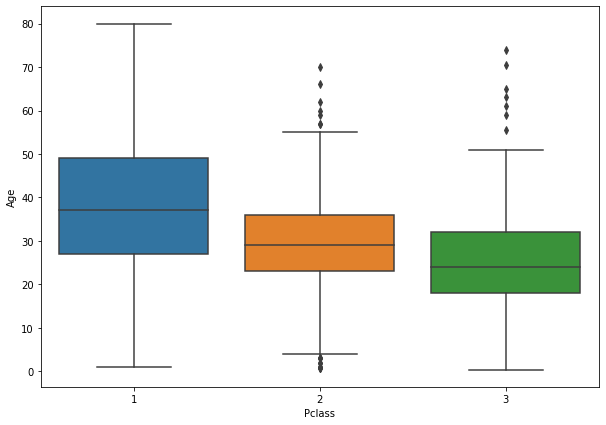

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_df)

In [49]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            age = 37
        elif pclass == 2:
            age = 29
        else: 
            age = 24
        
    return age

In [50]:
for df in all_df:
    df['Age'] = df[['Age','Pclass']].apply(fill_age, axis = 1)

In [51]:
for df in all_df:
    print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The only missing data left are the cabins. Taking a better look at the values of the cabins, we don't find much information other than the letter of the cabins and a numerical value. We can extract the letters and plot using them to check wether that could prove to be helpful.

In [52]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [53]:
cabin_letter= {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'N':8}

cabin = train_df['Cabin'].apply(lambda x : str(x)[0].upper()).map(cabin_letter)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

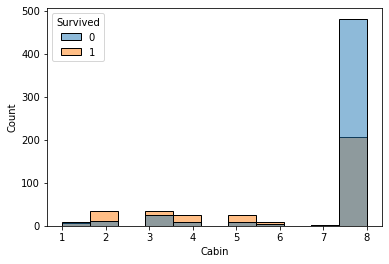

In [54]:
sns.histplot(x = cabin,hue = train_df['Survived'])

Looking at the plot, and how many values are missing I believe getting rid of cabins is the best solution.

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
for df in all_df:
    df.drop('Cabin', axis = 1, inplace = True)

Next is to work on the names in the data set. We see clearly that the names are in the following format: Name, 'Title'. Name. We can use that in our advantage to extract the titles.

In [57]:
title = train_df['Name'].apply(lambda x: (x.split(', ')[1:2][0]).split('.')[0]).rename('Title')
train_df = pd.concat([train_df,title],axis=1)

In [58]:
title = test_df['Name'].apply(lambda x: (x.split(', ')[1:2][0]).split('.')[0]).rename('Title')
test_df = pd.concat([test_df,title],axis=1)

In [59]:
print(train_df.Title.unique())
print(test_df.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [60]:
train_df = train_df.replace(['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'the Countess','Jonkheer','Dona'],'Others')
train_df = train_df.replace(['Mlle','Ms'], 'Miss')
train_df = train_df.replace('Mme','Mrs')

In [61]:
train_df[['Survived','Title']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [62]:
test_df = test_df.replace(['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'the Countess','Jonkheer','Dona'],'Others')
test_df = test_df.replace(['Mlle','Ms'], 'Miss')
test_df = test_df.replace('Mme','Mrs')

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [64]:
titles = {'Master':1, 'Miss':2, 'Mr':3, 'Mrs':4, 'Others':5}

all_df=[train_df,test_df]
for df in all_df:
    df['Title'] = df['Title'].map(titles)

We can now drop the name column.

In [65]:
for df in all_df:
    df.drop('Name', axis = 1, inplace = True)

Next is to clean the sex column into a numerical column.

In [66]:
for df in all_df:
    df['Sex'] = df['Sex'].map({ 'female': 0, 'male': 1}).astype(int)

We can also get rid of two columns: SibSp and Parch, which esentially represent a family.

In [67]:
for df in all_df:
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


The largest family did not survive unfortenately. However, we can see that being with someone increased the likelihood of survival. We can use that fact to divide the columns to alone or not.

In [68]:
for df in all_df:
    df['IsAlone'] = 0
    df.loc[df['Family'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


As we thought, being with someone increases the chance of survival. We can use this column now and drop SibSp, Parch and Family

In [69]:
for df in all_df:
    df.drop(['SibSp','Parch','Family'], axis = 1, inplace = True)

The tickets are most likely not useful since there are many repeating values (23.5%). They also cannot easily be conveyed into a numerical value that makes sense.

In [70]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [71]:
for df in all_df:
    df.drop('Ticket',inplace=True, axis= 1)

Looking at the embark, we find that there are 3 values either S,Q,C.
Just a quick reminder, 0 is female and 1 is male.

/home/bassel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bassel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


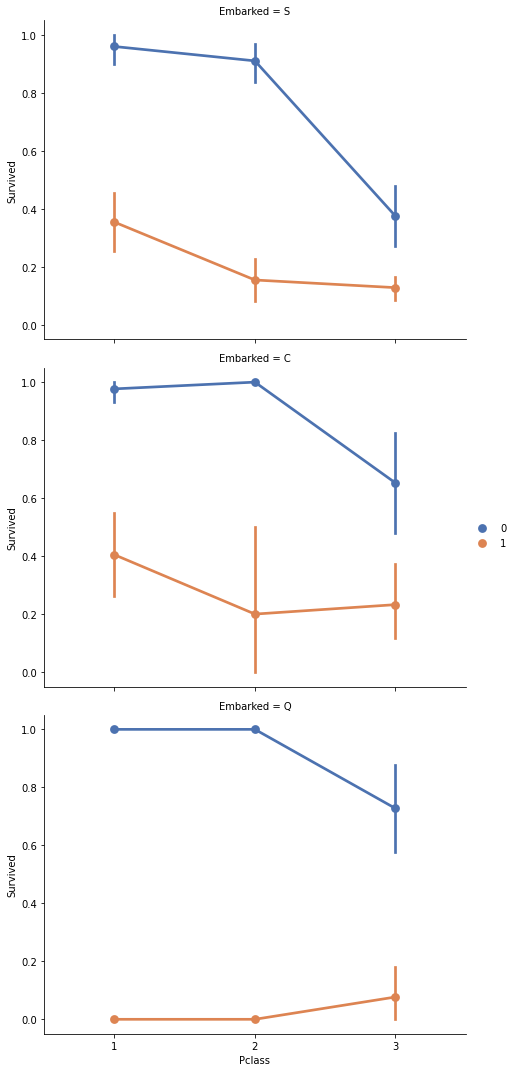

In [72]:
grid = sns.FacetGrid(train_df, row='Embarked', height=5, aspect=1.33)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Looking into the plot. We find that it doesn't matter where you are boarding, if you are a woman in first class you have a very high chance of survival.

In [73]:
embark = {'S': 0, 'C' : 1, 'Q':2}

for df in all_df:
    df['Embarked'] = df['Embarked'].map(embark).astype(int)

The data set seems to be complete. Using what we have I was able to achieve a 76% accuracy using the Random Forest model. However to improve on it even further we can adjust the values of Fare and Age to represent a number of numerical values instead of their current shapes.

In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,22.0,7.2500,0,3,0
1,2,1,1,0,38.0,71.2833,1,4,0
2,3,1,3,0,26.0,7.9250,0,2,1
3,4,1,1,0,35.0,53.1000,0,4,0
4,5,0,3,1,35.0,8.0500,0,3,1


We can begin by dividing the age column into 4 or 5 categories to see what the best fit is.

In [75]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 4)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [76]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


I believe using 5 is a better respresentation of the data. It shows the difference between kids and young adults, and as we saw earlier the 'Women and kids' first applies in this case. 

We can divide the ages into the different categories ranging from 0 to 4.

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,1,0,3,1,22.0,7.2500,0,3,0,"(16.336, 32.252]"
1,2,1,1,0,38.0,71.2833,1,4,0,"(32.252, 48.168]"
2,3,1,3,0,26.0,7.9250,0,2,1,"(16.336, 32.252]"
3,4,1,1,0,35.0,53.1000,0,4,0,"(32.252, 48.168]"
4,5,0,3,1,35.0,8.0500,0,3,1,"(32.252, 48.168]"


In [78]:
all_df = [train_df,test_df]
for df in all_df:    
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,1,0,3,1,1.0,7.2500,0,3,0,"(16.336, 32.252]"
1,2,1,1,0,2.0,71.2833,1,4,0,"(32.252, 48.168]"
2,3,1,3,0,1.0,7.9250,0,2,1,"(16.336, 32.252]"
3,4,1,1,0,2.0,53.1000,0,4,0,"(32.252, 48.168]"
4,5,0,3,1,2.0,8.0500,0,3,1,"(32.252, 48.168]"


In [79]:
for df in all_df:    
    df['Age'] = df['Age'].astype(int)

The upper line was just to convert the data in 'Age' to integers instead of floats. We can now drop the 'AgeBrand' column.

In [80]:
train_df.drop('AgeBand',axis = 1, inplace = True)

Now that we have dealt with the age, we are left with the fares. We can do the same thing and divide the prices to multiple columns. I assume that the prices can be divided into 3 (since there are 3 classes), however we can also check if we can seperate them with 4 and then choose as we find fit.

In [81]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 3)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [82]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Instead of using pd.cut, I use pd.qcut to get quantile-based discretization. We find that there is a 15% difference between 7->14 and 14->31. I will assume that there were differences between the second classes, that are causing this difference. It can be that the more expensive cabins have a better placement that causes their survival. Using these values we can divide the 'Fare' into 4 different categories running from 0 to 3.

In [83]:
for df in all_df:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)

In [84]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,2,0,2,3,1
1,893,3,0,2,0,0,4,0
2,894,2,1,3,1,2,3,1
3,895,3,1,1,1,0,3,1
4,896,3,0,1,1,0,4,0


In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,1,0,0,3,0
1,2,1,1,0,2,3,1,4,0
2,3,1,3,0,1,1,0,2,1
3,4,1,1,0,2,3,0,4,0
4,5,0,3,1,2,1,0,3,1


Lastly I found this trick in another write-up. That person used both the Pclass and the Age to create a new column. I believe that is a great idea, since the older people in first class have a higher chance of survival.

In [86]:
all_df = [train_df,test_df]
for df in all_df:
    df['Age*Class'] = df.Age * df.Pclass

Passenger id is just a numerical value that has no sense. We can drop it.

In [87]:
train_df.drop('PassengerId',axis =1 ,inplace = True)
Id = test_df.pop('PassengerId')

In [88]:
for df in all_df:
    print(df.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    1    1     0         0      3        0          3
1         1       1    0    2     3         1      4        0          2
2         1       3    0    1     1         0      2        1          3
3         1       1    0    2     3         0      4        0          2
4         0       3    1    2     1         0      3        1          6
   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0       3    1    2     0         2      3        1          6
1       3    0    2     0         0      4        0          6
2       2    1    3     1         2      3        1          6
3       3    1    1     1         0      3        1          3
4       3    0    1     1         0      4        0          3


# Model

We begin by dividing the dataset to train.

In [89]:
from sklearn.model_selection import train_test_split

X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Next I will be applying multiple models to check which has the best output.

In [90]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.42

In [91]:
from sklearn.svm import SVC
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.15

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

82.18

In [93]:
from sklearn.naive_bayes import GaussianNB
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.17

In [94]:
from sklearn.linear_model import Perceptron

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

78.49

In [95]:
from sklearn.svm import LinearSVC
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/home/bassel/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


80.26

In [96]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

72.23

In [97]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

87.8

In [98]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

87.8

In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.80
8,Decision Tree,87.80
0,Support Vector Machines,83.15
1,KNN,82.18
2,Logistic Regression,80.42
7,Linear SVC,80.26
5,Perceptron,78.49
4,Naive Bayes,78.17
6,Stochastic Gradient Decent,72.23


Random Forest and Decision Tree have the best distribution. However Decision Tree is most likely to overfit. 

I will use Random Forest as the the predictor.

In [100]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
predictions = random_forest.predict(test_df)

In [101]:
submission = pd.DataFrame({'PassengerId':Id,'Survived':predictions})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [102]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


In [103]:
!kaggle competitions submit -c titanic -f submission.csv -m 'RandomForestClassifier Continued Submission'

100%|████████████████████████████████████████| 2.77k/2.77k [00:04<00:00, 591B/s]
Successfully submitted to Titanic - Machine Learning from Disaster